In this project, we will like to know what Eter tells us about the regional contribution of expenditures on Research and Development

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis
#from sklearn.preprocessing import LabelEncoder
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
#load the exter data 
qmedata = pd.read_excel("dataproject.xlsx")
qmedata.tail(3)

,ETER ID Year,ETER ID,Institution Name,English Institution Name,Reference year,Institution Acronym,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (NC),R&D Expenditure (EURO),R&D Expenditure (PPP)
14313,UK0180.2011,UK0180,Scotland’s Rural College – SRUC,Scotland’s Rural College – SRUC,2011,SRUC,UK,1,a,m,m,m
14314,UK0181.2011,UK0181,St Mary's University College,St Mary's University College,2011,m,UK,1,a,m,m,m
14315,UK0182.2011,UK0182,Stranmillis University College,Stranmillis University College,2011,m,UK,1,a,m,m,m


In [3]:
entries = len(qmedata)

In [4]:
#drop Institution Acronym 
qmedata = qmedata.drop("Institution Acronym", axis = 1)

In [5]:
#checking for missing values(blanks)
qmedata.isnull().sum()

ETER ID Year                             0
ETER ID                                  0
Institution Name                         0
English Institution Name              1359
Reference year                           0
Country Code                             0
Research active institution              0
Total students enrolled at ISCED 8       0
R&D Expenditure (NC)                     0
R&D Expenditure (EURO)                   0
R&D Expenditure (PPP)                    0
dtype: int64

In [6]:
#dealing with the missing values(the blanks) for the English Institution Name by replacing them with the orginal 
#school name 
qmedata["English Institution Name"] = np.where(qmedata["English Institution Name"].isnull(), 
                                               qmedata["Institution Name"], qmedata["English Institution Name"])

In [7]:
qmedata.isnull().sum()

ETER ID Year                          0
ETER ID                               0
Institution Name                      0
English Institution Name              0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (NC)                  0
R&D Expenditure (EURO)                0
R&D Expenditure (PPP)                 0
dtype: int64

In [8]:
#total number institutions in each country or region in each year
pd.set_option('display.max_rows', 185) #show all variables 
qmedata.groupby(["Country Code","Reference year"])["Reference year"].count()

Country Code  Reference year
AL            2011               38
              2012               38
              2013               39
              2014               39
              2015               41
AT            2011               68
              2012               68
              2013               68
              2014               69
              2015               69
BE            2011               69
              2012               69
              2013               64
              2014               64
              2015               63
BG            2011               52
              2012               52
              2013               52
              2014               52
              2015               52
CH            2011               33
              2012               35
              2013               35
              2014               35
              2015               35
CY            2011               25
              2012               25

In [9]:
#dropping R&D Expenditure(NC), (PPP), ETER ID Year , English Institution Name  and focusing on just the Euro variable 
qmedata = qmedata.drop(["R&D Expenditure (NC)", "R&D Expenditure (PPP)", 
                        "ETER ID Year", "English Institution Name"], axis =1)
qmedata.head(5)

,ETER ID,Institution Name,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
0,AL0001,Universiteti i Tiranës,2015,AL,1,1764,m
1,AL0002,Universiteti Politeknik i Tiranës,2015,AL,1,325,m
2,AL0003,Universiteti Bujqësor i Tiranës,2015,AL,1,337,m
3,AL0004,"Universiteti i Elbasanit ""Aleksandër Xhuvani""",2015,AL,1,29,m
4,AL0005,"Universiteti ""Luigj Gurakuqi"", Shkodër",2015,AL,1,s,m


In [10]:
#finding inactive research institutions 
inactive = qmedata[(qmedata["Research active institution"] == 0) &
                  (qmedata["R&D Expenditure (EURO)"] == "a")]

In [11]:
inactive.sample(5)

,ETER ID,Institution Name,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
11854,CZ0061,"B.I.B.S., a.s.",2011,CZ,0,a,a
1619,IT0154,"Conservatorio di COMO ""Giuseppe Verdi""",2015,IT,0,a,a
13372,PL0056,Europejska Wyższa Szkoła Prawa i Administracji...,2011,PL,0,a,a
7919,PL0282,Wyższa Szkoła Ekonomii i Innowacji w Lublinie,2013,PL,0,a,a
4357,HR0021,"Veleučilište VERN`, Zagreb",2014,HR,0,a,a


In [12]:
#dropping this inactive research institutions
qmedata =qmedata.drop(qmedata[(qmedata["Research active institution"] == 0) &
                  (qmedata["R&D Expenditure (EURO)"] == "a")].index).reset_index(drop=True)
qmedata.head(5)

,ETER ID,Institution Name,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
0,AL0001,Universiteti i Tiranës,2015,AL,1,1764,m
1,AL0002,Universiteti Politeknik i Tiranës,2015,AL,1,325,m
2,AL0003,Universiteti Bujqësor i Tiranës,2015,AL,1,337,m
3,AL0004,"Universiteti i Elbasanit ""Aleksandër Xhuvani""",2015,AL,1,29,m
4,AL0005,"Universiteti ""Luigj Gurakuqi"", Shkodër",2015,AL,1,s,m


In [13]:
#number of institutions which have explicitly stated their activeness 
print("number of active research instituitons:", len(qmedata[qmedata["Research active institution"] == 1]))

number of active research instituitons: 8845


In [14]:
#the percentage  of institutions that have missing values(m) in terms of it being active
print("percentage of missing values, m:", 
      ((qmedata["Research active institution"] == "m") .sum()* 100 /entries).round())

percentage of missing values, m: 16.0


it can be seen that 16% of Reseacrh active institutions are missing, m. 

In [15]:
#finding the number of institutions that have missing values(m), confidential and
#non applicable entries as well as reasons in terms of it being active 
print("number of actual mssing values, m:", (qmedata["Research active institution"] == "m").sum())
print("number of not applicable:", (qmedata["Research active institution"] == "a").sum())
print("number of confidential:", (qmedata["Research active institution"] == "c").sum())
print("number of reasons:", (qmedata["Research active institution"] == "s").sum())

number of actual mssing values, m: 2326
number of not applicable: 0
number of confidential: 34
number of reasons: 1


In [16]:
print("percentage of confidential Research active institutions:", 
      ((qmedata["Research active institution"] == "c").sum()*100/ entries).round(2))

percentage of confidential Research active institutions: 0.24


In [17]:
#checking for the rest of the dataset, missing values
(((qmedata == "m")).sum()*100/ entries).round(2)

ETER ID                                0.00
Institution Name                       0.00
Reference year                         0.00
Country Code                           0.00
Research active institution           16.25
Total students enrolled at ISCED 8    16.71
R&D Expenditure (EURO)                67.02
dtype: float64

In [18]:
#replacing the missing values, m with blanks or NaNs
qmedata = qmedata.replace("m", np.nan)

In [19]:
#checking for the rest of the dataset, not applicable values
(qmedata == "a").sum()

ETER ID                                  0
Institution Name                         0
Reference year                           0
Country Code                             0
Research active institution              0
Total students enrolled at ISCED 8    3040
R&D Expenditure (EURO)                   2
dtype: int64

In [20]:
#treat non applicable as having no records  
qmedata = qmedata.replace("a", 0)

In [21]:
#checking for the rest of the dataset, not applicable values
(qmedata == "a").sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                0
dtype: int64

In [22]:
#checking for the rest of the dataset, confidential
((qmedata == "c").sum()*100/ entries).round(2)

ETER ID                               0.00
Institution Name                      0.00
Reference year                        0.00
Country Code                          0.00
Research active institution           0.24
Total students enrolled at ISCED 8    0.29
R&D Expenditure (EURO)                0.37
dtype: float64

it is safe to drop the confidential entries since they do not provide clear information and also since they make up about 0.24% of the research active institutions. it can be said that research institution who have confidential research status are likely not to give information on the rest of the variables of interest.

In [23]:
qmedata = qmedata.drop(qmedata[(qmedata["Research active institution"] == "c") &
                              (qmedata["Total students enrolled at ISCED 8"] == "c") &
                              (qmedata["R&D Expenditure (EURO)"] == "c")].index).reset_index(drop=True)

In [24]:
#checking for the rest of the dataset, reasons
((qmedata == "s").sum()*100/ entries).round(2)

ETER ID                               0.00
Institution Name                      0.00
Reference year                        0.00
Country Code                          0.00
Research active institution           0.01
Total students enrolled at ISCED 8    0.57
R&D Expenditure (EURO)                0.00
dtype: float64

In [25]:
((qmedata == "xc").sum()*100/ entries).round(2)

ETER ID                               0.0
Institution Name                      0.0
Reference year                        0.0
Country Code                          0.0
Research active institution           0.0
Total students enrolled at ISCED 8    0.0
R&D Expenditure (EURO)                0.0
dtype: float64

In [26]:
((qmedata == "xr").sum()*100/ entries).round(2)

ETER ID                               0.00
Institution Name                      0.00
Reference year                        0.00
Country Code                          0.00
Research active institution           0.00
Total students enrolled at ISCED 8    0.06
R&D Expenditure (EURO)                0.00
dtype: float64

In [27]:
((qmedata == "x").sum()*100/ entries).round(2)

ETER ID                               0.00
Institution Name                      0.00
Reference year                        0.00
Country Code                          0.00
Research active institution           0.00
Total students enrolled at ISCED 8    1.41
R&D Expenditure (EURO)                0.00
dtype: float64

In [28]:
((qmedata == "nc").sum()*100/ entries).round(2)

ETER ID                               0.0
Institution Name                      0.0
Reference year                        0.0
Country Code                          0.0
Research active institution           0.0
Total students enrolled at ISCED 8    0.0
R&D Expenditure (EURO)                0.0
dtype: float64

In [29]:
#solution for s under research active institution. treating s as missing under research active institution
#and imputing it with the mode later
qmedata["Research active institution"] = qmedata["Research active institution"].replace("s", np.nan)

In [30]:
#Treating x and xr as missing values 
qmedata = qmedata.replace(["x","xr"], np.nan)

the main variable of interest is the R&D Expenditure (EURO), therefore we are state that, R&D Expenditure (EURO)  is the target variable

In [31]:
qmedata.isnull().sum()

ETER ID                                  0
Institution Name                         0
Reference year                           0
Country Code                             0
Research active institution           2327
Total students enrolled at ISCED 8    2603
R&D Expenditure (EURO)                9595
dtype: int64

In [32]:
qmedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 7 columns):
ETER ID                               11226 non-null object
Institution Name                      11226 non-null object
Reference year                        11226 non-null int64
Country Code                          11226 non-null object
Research active institution           8899 non-null float64
Total students enrolled at ISCED 8    8623 non-null object
R&D Expenditure (EURO)                1631 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 614.0+ KB


In [33]:
#dealing with the missing values in Research Active Instutitions with the mode 
qmedata["Research active institution"].mode()

0    1.0
dtype: float64

In [34]:
qmedata["Research active institution"].fillna(1, inplace = True)

In [35]:
#treating s under Total students as missing values 
qmedata["Total students enrolled at ISCED 8"] = qmedata["Total students enrolled at ISCED 8"].replace("s", np.nan)

In [36]:
(qmedata["Total students enrolled at ISCED 8"] == "c").sum()

7

In [37]:
qmedata = qmedata.drop(qmedata[(qmedata["Total students enrolled at ISCED 8"] == "c")].index).reset_index(drop=True)

In [38]:
qmedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11219 entries, 0 to 11218
Data columns (total 7 columns):
ETER ID                               11219 non-null object
Institution Name                      11219 non-null object
Reference year                        11219 non-null int64
Country Code                          11219 non-null object
Research active institution           11219 non-null float64
Total students enrolled at ISCED 8    8535 non-null object
R&D Expenditure (EURO)                1624 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 613.6+ KB


In [39]:
#converting the total student column in int
qmedata["Total students enrolled at ISCED 8"] = pd.to_numeric(qmedata["Total students enrolled at ISCED 8"])

In [40]:
(qmedata["Total students enrolled at ISCED 8"]).isnull().sum()

2684

In [41]:
qmedataAL = qmedata[qmedata["Country Code"] == "AL"]
qmedataAL.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8     86
R&D Expenditure (EURO)                173
dtype: int64

In [42]:
qmedataAL["Total students enrolled at ISCED 8"] = qmedataAL["Total students enrolled at ISCED 8"].fillna(qmedataAL["Total students enrolled at ISCED 8"].mean())
                                                                                                         

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
qmedataAT = qmedata[qmedata["Country Code"] == "AT"]
qmedataAT.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      0
R&D Expenditure (EURO)                276
dtype: int64

In [44]:
qmedataBE = qmedata[qmedata["Country Code"] == "BE"]
qmedataBE.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    207
R&D Expenditure (EURO)                329
dtype: int64

In [45]:
qmedataBE["Total students enrolled at ISCED 8"] = qmedataBE["Total students enrolled at ISCED 8"].fillna(qmedataBE["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
qmedataBG = qmedata[qmedata["Country Code"] == "BG"]
qmedataBG.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      3
R&D Expenditure (EURO)                191
dtype: int64

In [47]:
qmedataBG["Total students enrolled at ISCED 8"] = qmedataBG["Total students enrolled at ISCED 8"].fillna(qmedataBG["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
qmedataCH = qmedata[qmedata["Country Code"] == "CH"]
qmedataCH.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     0
R&D Expenditure (EURO)                11
dtype: int64

In [49]:
qmedataCY = qmedata[qmedata["Country Code"] == "CY"]
qmedataCY.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                2
dtype: int64

In [50]:
qmedataCZ = qmedata[qmedata["Country Code"] == "CZ"]
qmedataCZ.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      2
R&D Expenditure (EURO)                222
dtype: int64

In [51]:
qmedataCZ["Total students enrolled at ISCED 8"] = qmedataCZ["Total students enrolled at ISCED 8"].fillna(qmedataCZ["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
qmedataDE = qmedata[qmedata["Country Code"] == "DE"]
qmedataDE.isnull().sum()

ETER ID                                  0
Institution Name                         0
Reference year                           0
Country Code                             0
Research active institution              0
Total students enrolled at ISCED 8      43
R&D Expenditure (EURO)                1908
dtype: int64

In [53]:
qmedataDE["Total students enrolled at ISCED 8"] = qmedataDE["Total students enrolled at ISCED 8"].fillna(qmedataDE["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [54]:
qmedataDK = qmedata[qmedata["Country Code"] == "DK"]
qmedataDK.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8    23
R&D Expenditure (EURO)                72
dtype: int64

In [55]:
qmedataDK["Total students enrolled at ISCED 8"] = qmedataDK["Total students enrolled at ISCED 8"].fillna(qmedataDK["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
qmedataEE = qmedata[qmedata["Country Code"] == "EE"]
qmedataEE.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     0
R&D Expenditure (EURO)                29
dtype: int64

In [57]:
qmedataES = qmedata[qmedata["Country Code"] == "ES"]
qmedataES.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    235
R&D Expenditure (EURO)                400
dtype: int64

In [58]:
qmedataES["Total students enrolled at ISCED 8"] = qmedataES["Total students enrolled at ISCED 8"].fillna(qmedataES["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
qmedataFI = qmedata[qmedata["Country Code"] == "FI"]
qmedataFI.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     0
R&D Expenditure (EURO)                59
dtype: int64

In [60]:
qmedataFR = qmedata[qmedata["Country Code"] == "FR"]
qmedataFR.isnull().sum()

ETER ID                                  0
Institution Name                         0
Reference year                           0
Country Code                             0
Research active institution              0
Total students enrolled at ISCED 8     712
R&D Expenditure (EURO)                1355
dtype: int64

In [61]:
qmedataFR["Total students enrolled at ISCED 8"] = qmedataFR["Total students enrolled at ISCED 8"].fillna(qmedataFR["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
qmedataGR = qmedata[qmedata["Country Code"] == "GR"]
qmedataGR.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      4
R&D Expenditure (EURO)                112
dtype: int64

In [63]:
qmedataGR["Total students enrolled at ISCED 8"] = qmedataGR["Total students enrolled at ISCED 8"].fillna(qmedataGR["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
qmedataHR = qmedata[qmedata["Country Code"] == "HR"]
qmedataHR.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     0
R&D Expenditure (EURO)                51
dtype: int64

In [65]:
qmedataHU = qmedata[qmedata["Country Code"] == "HU"]
qmedataHU.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8     52
R&D Expenditure (EURO)                208
dtype: int64

In [66]:
qmedataHU["Total students enrolled at ISCED 8"] = qmedataHU["Total students enrolled at ISCED 8"].fillna(qmedataHU["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
qmedataIE = qmedata[qmedata["Country Code"] == "IE"]
qmedataIE.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      8
R&D Expenditure (EURO)                134
dtype: int64

In [68]:
qmedataIE["Total students enrolled at ISCED 8"] = qmedataIE["Total students enrolled at ISCED 8"].fillna(qmedataIE["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
qmedataIS = qmedata[qmedata["Country Code"] == "IS"]
qmedataIS.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     4
R&D Expenditure (EURO)                35
dtype: int64

In [70]:
qmedataIS["Total students enrolled at ISCED 8"] = qmedataIS["Total students enrolled at ISCED 8"].fillna(qmedataIS["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
qmedataIT = qmedata[qmedata["Country Code"] == "IT"]
qmedataIT.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      8
R&D Expenditure (EURO)                422
dtype: int64

In [72]:
qmedataIT["Total students enrolled at ISCED 8"] = qmedataIT["Total students enrolled at ISCED 8"].fillna(qmedataIT["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
qmedataLI = qmedata[qmedata["Country Code"] == "LI"]
qmedataLI.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                5
dtype: int64

In [74]:
qmedataLT = qmedata[qmedata["Country Code"] == "LT"]
qmedataLT.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    2
R&D Expenditure (EURO)                8
dtype: int64

In [75]:
qmedataLT["Total students enrolled at ISCED 8"] = qmedataLT["Total students enrolled at ISCED 8"].fillna(qmedataLT["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
qmedataLU = qmedata[qmedata["Country Code"] == "LU"]
qmedataLU.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                2
dtype: int64

In [77]:
qmedataLV = qmedata[qmedata["Country Code"] == "LV"]
qmedataLV.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    5
R&D Expenditure (EURO)                0
dtype: int64

In [78]:
qmedataLV["Total students enrolled at ISCED 8"] = qmedataLV["Total students enrolled at ISCED 8"].fillna(qmedataLV["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
qmedataME = qmedata[qmedata["Country Code"] == "ME"]  #all missing values so no mean
qmedataME.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8    49
R&D Expenditure (EURO)                49
dtype: int64

In [80]:
qmedataMK = qmedata[qmedata["Country Code"] == "MK"]
qmedataMK.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8    28
R&D Expenditure (EURO)                57
dtype: int64

In [81]:
qmedataMK["Total students enrolled at ISCED 8"] = qmedataMK["Total students enrolled at ISCED 8"].fillna(qmedataMK["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
qmedataMT = qmedata[qmedata["Country Code"] == "MT"]
qmedataMT.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                1
dtype: int64

In [83]:
qmedataNL = qmedata[qmedata["Country Code"] == "NL"]
qmedataNL.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8     13
R&D Expenditure (EURO)                280
dtype: int64

In [84]:
qmedataNL["Total students enrolled at ISCED 8"] = qmedataNL["Total students enrolled at ISCED 8"].fillna(qmedataNL["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
qmedataNO = qmedata[qmedata["Country Code"] == "NO"]
qmedataNO.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      9
R&D Expenditure (EURO)                150
dtype: int64

In [86]:
qmedataNO["Total students enrolled at ISCED 8"] = qmedataNO["Total students enrolled at ISCED 8"].fillna(qmedataNO["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
qmedataPL = qmedata[qmedata["Country Code"] == "PL"]
qmedataPL.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      2
R&D Expenditure (EURO)                259
dtype: int64

In [88]:
qmedataPL["Total students enrolled at ISCED 8"] = qmedataPL["Total students enrolled at ISCED 8"].fillna(qmedataPL["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
qmedataPT = qmedata[qmedata["Country Code"] == "PT"]
qmedataPT.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      0
R&D Expenditure (EURO)                128
dtype: int64

In [90]:
qmedataRO = qmedata[qmedata["Country Code"] == "RO"] #all missing so no mean
qmedataRO.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    504
R&D Expenditure (EURO)                504
dtype: int64

In [91]:
qmedataRS = qmedata[qmedata["Country Code"] == "RS"]
qmedataRS.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    159
R&D Expenditure (EURO)                202
dtype: int64

In [92]:
qmedataRS["Total students enrolled at ISCED 8"] = qmedataRS["Total students enrolled at ISCED 8"].fillna(qmedataRS["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
qmedataSE = qmedata[qmedata["Country Code"] == "SE"]
qmedataSE.isnull().sum()

ETER ID                               0
Institution Name                      0
Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    1
R&D Expenditure (EURO)                4
dtype: int64

In [94]:
qmedataSE["Total students enrolled at ISCED 8"] = qmedataSE["Total students enrolled at ISCED 8"].fillna(qmedataSE["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
qmedataSI = qmedata[qmedata["Country Code"] == "SI"]
qmedataSI.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    125
R&D Expenditure (EURO)                201
dtype: int64

In [96]:
qmedataSI["Total students enrolled at ISCED 8"] = qmedataSI["Total students enrolled at ISCED 8"].fillna(qmedataSI["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [97]:
qmedataSK = qmedata[qmedata["Country Code"] == "SK"]
qmedataSK.isnull().sum()

ETER ID                                0
Institution Name                       0
Reference year                         0
Country Code                           0
Research active institution            0
Total students enrolled at ISCED 8     0
R&D Expenditure (EURO)                58
dtype: int64

In [98]:
qmedataTR = qmedata[qmedata["Country Code"] == "TR"]
qmedataTR.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8    398
R&D Expenditure (EURO)                903
dtype: int64

In [99]:
qmedataTR["Total students enrolled at ISCED 8"] = qmedataTR["Total students enrolled at ISCED 8"].fillna(qmedataTR["Total students enrolled at ISCED 8"].mean())

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
qmedataUK = qmedata[qmedata["Country Code"] == "UK"]
qmedataUK.isnull().sum()

ETER ID                                 0
Institution Name                        0
Reference year                          0
Country Code                            0
Research active institution             0
Total students enrolled at ISCED 8      2
R&D Expenditure (EURO)                795
dtype: int64

In [101]:
qmedataUK["Total students enrolled at ISCED 8"] = qmedataUK["Total students enrolled at ISCED 8"].fillna(qmedataUK["Total students enrolled at ISCED 8"].mean(), inplace = True)

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
#entire dataset
qmedata = pd.concat((qmedataAL, qmedataAT, qmedataBE, qmedataBG, qmedataCH, qmedataCY, qmedataCZ,
                     qmedataDE, qmedataDK, qmedataEE, qmedataES, qmedataFI, qmedataFR, qmedataGR,
                     qmedataHR, qmedataHU, qmedataIE, qmedataIS, qmedataIT, qmedataLI, qmedataLT, 
                     qmedataLU,qmedataLV, qmedataME, qmedataMK, qmedataMT, qmedataNL, qmedataNO, 
                     qmedataPL, qmedataPT, qmedataRO, qmedataRS, qmedataSE, qmedataSI, qmedataSK,
                     qmedataTR, qmedataUK))

In [103]:
qmedata  = qmedata.sort_values("Reference year", ascending = False )

In [104]:
#dealing with the missing of total students 
#replacing the missing values in data(train) with mean 
qmedata["Total students enrolled at ISCED 8"] = qmedata["Total students enrolled at ISCED 8"].fillna(qmedata["Total students enrolled at ISCED 8"].mean())

In [105]:
#Checking for missing values,m in terms of that 
(((qmedata["R&D Expenditure (EURO)"].isnull()).sum()) * 100/entries).round()

67.0

In [106]:
qmedata = qmedata.drop(qmedata[(qmedata["R&D Expenditure (EURO)"] == "c")].index).reset_index(drop=True)

In [107]:
#converting to numeric 
qmedata["R&D Expenditure (EURO)"] = pd.to_numeric(qmedata["R&D Expenditure (EURO)"])

In [108]:
qmedata.head(1)

,ETER ID,Institution Name,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
0,AL0001,Universiteti i Tiranës,2015,AL,1.0,1764.0,NaN


In [109]:
#saving some columns 
eterid = qmedata["ETER ID"]
instname = qmedata["Institution Name"]
year = qmedata["Reference year"]
country = qmedata["Country Code"]
active = qmedata["Research active institution"]
student = qmedata["Total students enrolled at ISCED 8"]

In [110]:
#dropping some irrevelant columns 
qmedata = qmedata.drop(["ETER ID", "Institution Name"], axis =1)

In [111]:
qmedata.head(1)

,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
0,2015,AL,1.0,1764.0,NaN


In [112]:
data =  qmedata[(qmedata["R&D Expenditure (EURO)"].notna())] #data without missing values 
data.head(1)

,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
212,2015,FI,1.0,0.0,3226000.0


about 67% of the entries missing values. in order to impute these missing values, using simple linear regression using total students as the independent variable . to achieve this, i will divide the data into two parts. 

using the Supervised Learning; Regression under Record Linked Method of Data Quality techinques, dividing the entire dataset into trainset and testset and using the regression algorithm to get the missing values for the variable of interest.

setting the model as a Multiple Linear Regression Model, assuming that y(outcome), R&D Expenditure (Euro) is a continuous variable and our independent variables, x are country code, reference year, research active institution and total students enrolled at ISCED 8.

y = $β_0$ + $β_1$$x_1$ + $β_2$$x_2$ + $β_3$$x_3$+ $β_4$$x_4$  + E

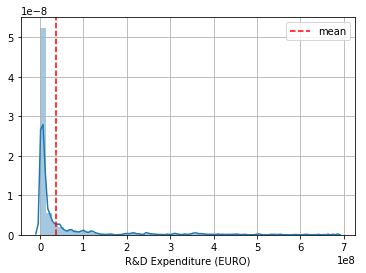

In [113]:
mean = data["R&D Expenditure (EURO)"].describe()['mean']
#plotting skewness 
sns.distplot(data["R&D Expenditure (EURO)"], norm_hist = True)
plt.axvline(x = mean, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()

In [114]:
data["R&D Expenditure (EURO)"].describe()

count    1.612000e+03
mean     3.684673e+07
std      9.323268e+07
min      0.000000e+00
25%      6.179592e+05
50%      3.964830e+06
75%      1.928597e+07
max      6.820328e+08
Name: R&D Expenditure (EURO), dtype: float64

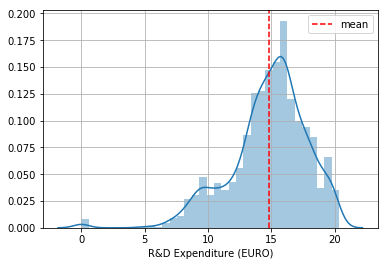

In [115]:
Transformed = np.log1p(data["R&D Expenditure (EURO)"]) #log transform of the target variable
mean_Trans = Transformed.describe()["mean"]
sns.distplot(Transformed, norm_hist = True)
plt.axvline(x = mean_Trans, color = "red", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In [116]:
#checking skeweness of students
qmedata["Total students enrolled at ISCED 8"].skew()

4.62162400484708

In [117]:
correlation = data.corr()
correlation.sort_values(["R&D Expenditure (EURO)"])
correlation

,Reference year,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
Reference year,1.000000,-0.040277,-0.020152,-0.045300
Research active institution,-0.040277,1.000000,0.096792,0.072037
Total students enrolled at ISCED 8,-0.020152,0.096792,1.000000,0.736065
R&D Expenditure (EURO),-0.045300,0.072037,0.736065,1.000000


In [118]:
#normalizing 
qmedata["Total students enrolled at ISCED 8"] = np.log1p(qmedata["Total students enrolled at ISCED 8"])
qmedata["Total students enrolled at ISCED 8"].skew()

-0.5016187371995877

convert the caterogical variable into quantitative variable. here, the country codes are considered as categorical data 

In [119]:
#one hot encoding 
qmedata = pd.get_dummies(qmedata)
qmedata.sample(5)

,Reference year,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO),Country Code_AL,Country Code_AT,Country Code_BE,Country Code_BG,Country Code_CH,Country Code_CY,...,Country Code_NO,Country Code_PL,Country Code_PT,Country Code_RO,Country Code_RS,Country Code_SE,Country Code_SI,Country Code_SK,Country Code_TR,Country Code_UK
2669,2014,1.0,6.516193,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4280,2014,1.0,5.446737,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9110,2011,1.0,0.000000,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2839,2014,1.0,0.000000,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3590,2014,1.0,6.143834,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Fitting the model

In [120]:
missing = qmedata[qmedata["R&D Expenditure (EURO)"].isnull()]  #testset 
missing.head(5)

,Reference year,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO),Country Code_AL,Country Code_AT,Country Code_BE,Country Code_BG,Country Code_CH,Country Code_CY,...,Country Code_NO,Country Code_PL,Country Code_PT,Country Code_RO,Country Code_RS,Country Code_SE,Country Code_SI,Country Code_SK,Country Code_TR,Country Code_UK
0,2015,1.0,7.475906,NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1.0,0.000000,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,1.0,0.000000,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,1.0,0.000000,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1.0,0.000000,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
number_of_missng_entries = len(missing)
number_of_missng_entries

9595

In [122]:
#dropping the R&D Expenditure since it is missing and would be predicted with linear regression
missing = missing.drop("R&D Expenditure (EURO)", axis =1)
missing.head(5)

,Reference year,Research active institution,Total students enrolled at ISCED 8,Country Code_AL,Country Code_AT,Country Code_BE,Country Code_BG,Country Code_CH,Country Code_CY,Country Code_CZ,...,Country Code_NO,Country Code_PL,Country Code_PT,Country Code_RO,Country Code_RS,Country Code_SE,Country Code_SI,Country Code_SK,Country Code_TR,Country Code_UK
0,2015,1.0,7.475906,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,1.0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,1.0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,1.0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,1.0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
not_missing =  qmedata[(qmedata["R&D Expenditure (EURO)"].notna())]
not_missing = not_missing.drop("R&D Expenditure (EURO)", axis =1)
not_missing.head(1)

,Reference year,Research active institution,Total students enrolled at ISCED 8,Country Code_AL,Country Code_AT,Country Code_BE,Country Code_BG,Country Code_CH,Country Code_CY,Country Code_CZ,...,Country Code_NO,Country Code_PL,Country Code_PT,Country Code_RO,Country Code_RS,Country Code_SE,Country Code_SI,Country Code_SK,Country Code_TR,Country Code_UK
212,2015,1.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
len(not_missing)

1612

In [125]:
y = Transformed #data["R&D Expenditure (EURO)"]
#y = np.log1p(y) #log transform of the target variable

In [126]:
R = RobustScaler()
R.fit(not_missing)
x_train = R.transform(not_missing) #normilaze the dataset to withstand outliers
R.fit(missing)
x_test = R.transform(missing)

testing for several number of regression models to find the best 

In [127]:
def rmse_md(estimator, x, y):
    rmse = np.sqrt(-cross_val_score(estimator, x, y, cv= 5, scoring="neg_mean_squared_error")).mean()
    return rmse  #Root mean square error

In [128]:
br = linear_model.BayesianRidge()
br.fit(x_train, y)
score = rmse_md(br, x_train, y)
print("score of Bayesian Ridge :",score)
R_squared = br.score(x_train, y)
print("score of R_squared :", R_squared)

score of Bayesian Ridge : 2.126025542597246
score of R_squared : 0.6106516580519568


In [129]:
from sklearn.linear_model import RidgeCV  
rg = RidgeCV(cv = 5)
rg.fit(x_train, y)
score = rmse_md(rg, x_train, y)
print("score of Ridge Regression :", score)
R_squared = rg.score(x_train, y)
print("score of R_squared :", R_squared)

/Users/dzidziquist/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score of Ridge Regression : 2.1157184051941202
score of R_squared : 0.6004397989702235


In [130]:
from sklearn.linear_model import LassoCV #using the cross validation
ls = LassoCV(cv = 5)
ls.fit(x_train, y)
score = rmse_md(ls, x_train, y)
print("score of Lasso Regression :", score)
R_squared = ls.score(x_train, y)
print("score of R_squared :", R_squared)

score of Lasso Regression : 2.1206238020814725
score of R_squared : 0.5986465876790898


In [131]:
from sklearn.linear_model import ElasticNetCV #using the cross validation
en = ElasticNetCV(cv = 5)
en.fit(x_train, y)
score = rmse_md(en, x_train, y)
print("score of ElasticNet Regression :", score)
R_squared = en.score(x_train, y)
print("score of R_squared :", R_squared)

score of ElasticNet Regression : 2.1256413495100976
score of R_squared : 0.6011612274612516


In [132]:
import xgboost
xgb = xgboost.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=7600,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(x_train, y)
score = rmse_md(xgb, x_train, y)
print("score of xgb:", score)
R_squared = xgb.score(x_train, y)
print("score of R_squared :", R_squared)

score of xgb: 1.850942819061406
score of R_squared : 0.8692696389547485


In [133]:
y_pred = np.expm1(xgb.predict(x_test))

In [134]:
Predict = pd.DataFrame(y_pred)
#Predict["ETER ID"] = eterid
#Predict["Institution Name"] = instname
Predict["Reference year"] = year
Predict["Country Code"] = country
Predict["Research active institution"] = active
Predict["Total students enrolled at ISCED 8"] = student
Predict = Predict.rename(columns={0: "R&D Expenditure (EURO)"})
Predict = Predict[["Reference year", "Country Code", "Research active institution",
                  "Total students enrolled at ISCED 8", "R&D Expenditure (EURO)"]]

In [135]:
Predict.head(1)

,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
0,2015,AL,1.0,1764.0,18662510.0


In [136]:
Predict.isnull().sum()

Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                0
dtype: int64

In [137]:
(Predict == "UK").sum()

Reference year                          0
Country Code                          794
Research active institution             0
Total students enrolled at ISCED 8      0
R&D Expenditure (EURO)                  0
dtype: int64

In [138]:
data.head(1)

,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
212,2015,FI,1.0,0.0,3226000.0


In [139]:
data.isnull().sum()

Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                0
dtype: int64

concatenating the predicted data with the data without missing values

In [140]:
finaldata = pd.concat((data, Predict))

In [141]:
finaldata.head(1)

,Reference year,Country Code,Research active institution,Total students enrolled at ISCED 8,R&D Expenditure (EURO)
212,2015,FI,1.0,0.0,3226000.0


In [142]:
finaldata.isnull().sum()

Reference year                        0
Country Code                          0
Research active institution           0
Total students enrolled at ISCED 8    0
R&D Expenditure (EURO)                0
dtype: int64

In [143]:
finaldata.to_csv("finaldata2.csv", index=True)

In [144]:
#data per year 
finaldata_2011 = finaldata[finaldata["Reference year"] == 2011]
finaldata_2012 = finaldata[finaldata["Reference year"] == 2012]
finaldata_2013 = finaldata[finaldata["Reference year"] == 2013]
finaldata_2014 = finaldata[finaldata["Reference year"] == 2014]
finaldata_2015 = finaldata[finaldata["Reference year"] == 2015]

### Analysis of data in 2011


In [145]:
fd_2011 = finaldata_2011.groupby(["Country Code"])["R&D Expenditure (EURO)"].sum()
ffd_2011 = pd.DataFrame(fd_2011)
ffd_2011

,R&D Expenditure (EURO)
Country Code,
AL,4.539799e+05
AT,1.885075e+09
BE,1.258651e+07
BG,1.211826e+07
CH,3.690535e+09
CY,5.714400e+07
CZ,1.194684e+04
DE,1.970341e+08
DK,1.785706e+09


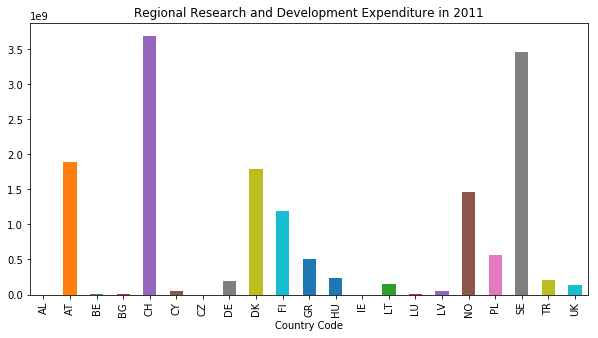

In [146]:
fd_2011.plot.bar(figsize=(10,5), title = "Regional Research and Development Expenditure in 2011")

Text(0, 0.5, 'R&D Expediture(Euro) in Billions')

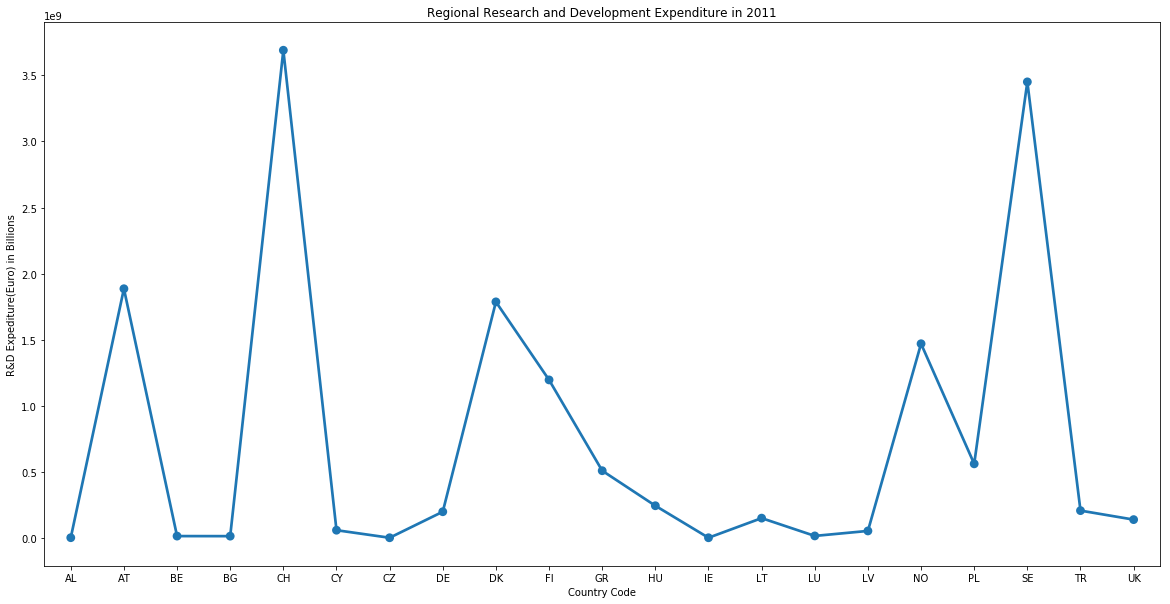

In [147]:
plt.figure(figsize = (20,10))
sns.pointplot(fd_2011.index, fd_2011.values)
plt.title("Regional Research and Development Expenditure in 2011")
plt.ylabel("R&D Expediture(Euro) in Billions")

### Analysis of data in 2012


In [148]:
#analysis data in 2012
fd_2012 = finaldata_2012.groupby(["Country Code"])["R&D Expenditure (EURO)"].sum()
ffd_2012 = pd.DataFrame(fd_2012)
ffd_2012

,R&D Expenditure (EURO)
Country Code,
AL,4.813261e+07
AT,1.318859e+08
BE,6.014255e+07
BG,2.471245e+07
CH,3.506390e+09
CY,6.113462e+07
CZ,1.133894e+08
DE,5.848813e+08
DK,1.875911e+09


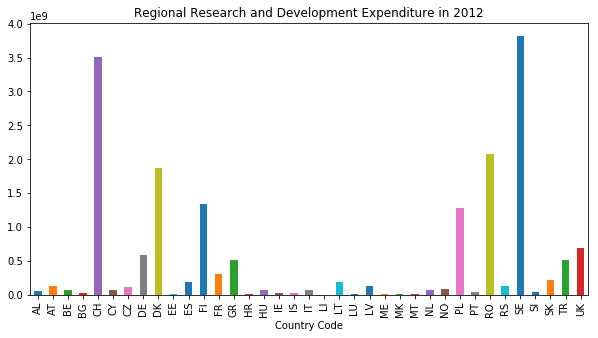

In [149]:
fd_2012.plot.bar(figsize=(10,5), title = "Regional Research and Development Expenditure in 2012")

Text(0, 0.5, 'R&D Expediture(Euro) in Billions')

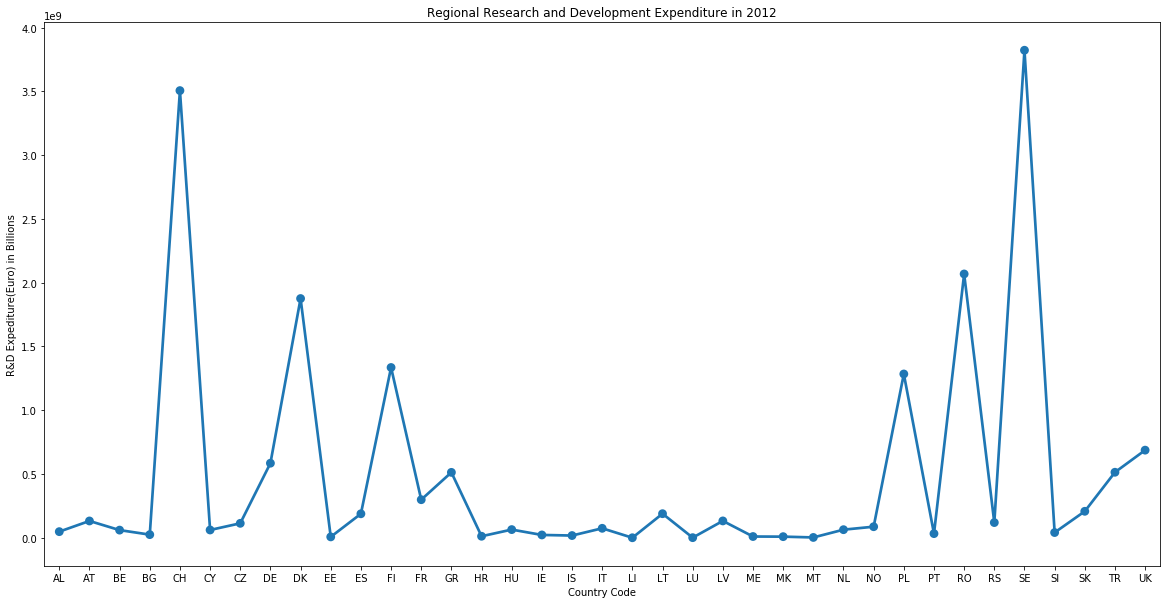

In [150]:
plt.figure(figsize = (20,10))
sns.pointplot(fd_2012.index, fd_2012.values)
plt.title("Regional Research and Development Expenditure in 2012")
plt.ylabel("R&D Expediture(Euro) in Billions")

### Analysis of data in 2013


In [151]:
#analysis data in 2013
fd_2013 = finaldata_2013.groupby(["Country Code"])["R&D Expenditure (EURO)"].sum()
ffd_2013 = pd.DataFrame(fd_2013)
ffd_2013

,R&D Expenditure (EURO)
Country Code,
AL,5.783430e+07
AT,2.145857e+09
BE,2.059377e+08
BG,1.013625e+08
CH,3.597332e+09
CY,8.442872e+07
CZ,1.331442e+08
DE,1.049265e+09
DK,2.043812e+09


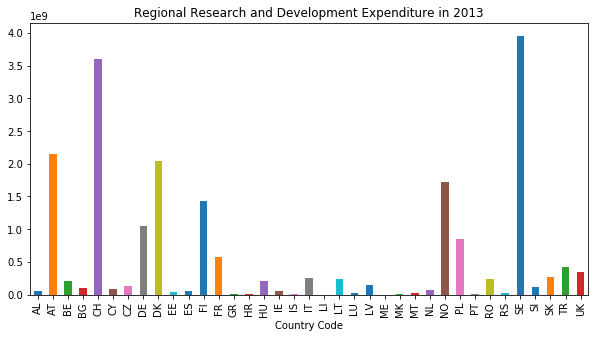

In [152]:
fd_2013.plot.bar(figsize=(10,5), title = "Regional Research and Development Expenditure in 2013")

Text(0, 0.5, 'R&D Expediture(Euro) in Billions')

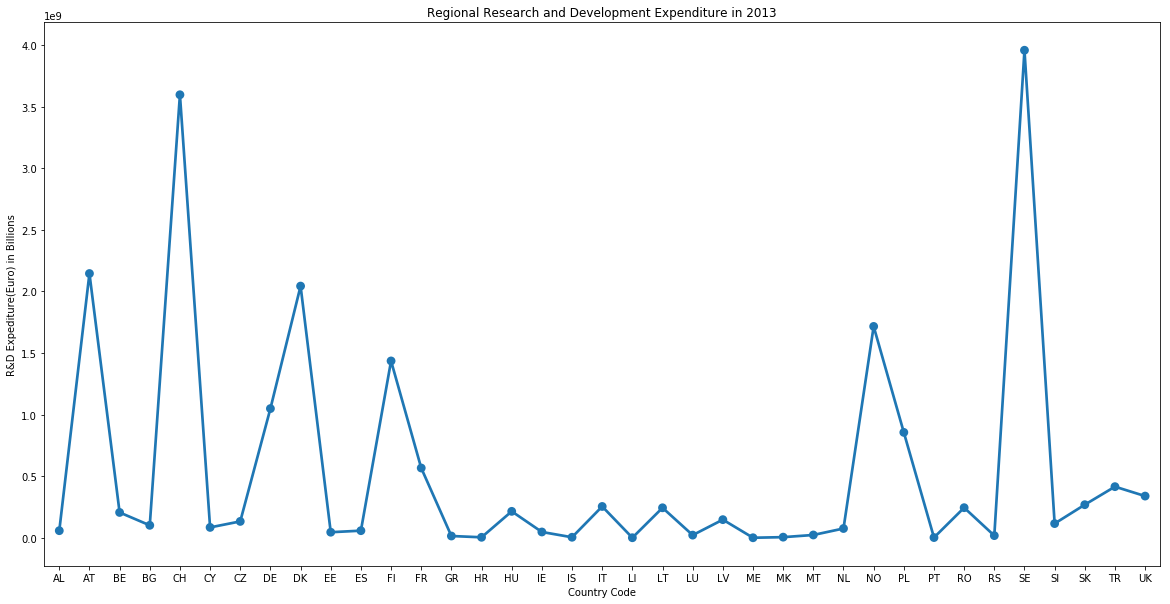

In [153]:
plt.figure(figsize = (20,10))
sns.pointplot(fd_2013.index, fd_2013.values)
plt.title("Regional Research and Development Expenditure in 2013")
plt.ylabel("R&D Expediture(Euro) in Billions")

### Analysis of data in 2014


In [154]:
#analysis data in 2014
fd_2014 = finaldata_2014.groupby(["Country Code"])["R&D Expenditure (EURO)"].sum()
ffd_2014 = pd.DataFrame(fd_2014)
ffd_2014

,R&D Expenditure (EURO)
Country Code,
AL,4.205092e+06
AT,8.638084e+07
BE,1.120541e+08
BG,3.747954e+06
CH,4.094217e+09
CY,4.335862e+07
CZ,1.304276e+09
DE,1.000245e+09
DK,1.312918e+06


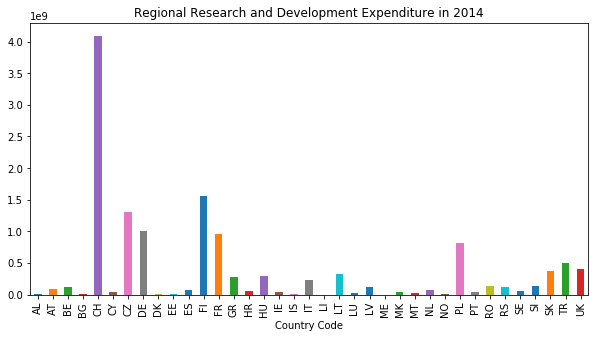

In [155]:
fd_2014.plot.bar(figsize=(10,5), title = "Regional Research and Development Expenditure in 2014")

Text(0, 0.5, 'R&D Expediture(Euro) in Billions')

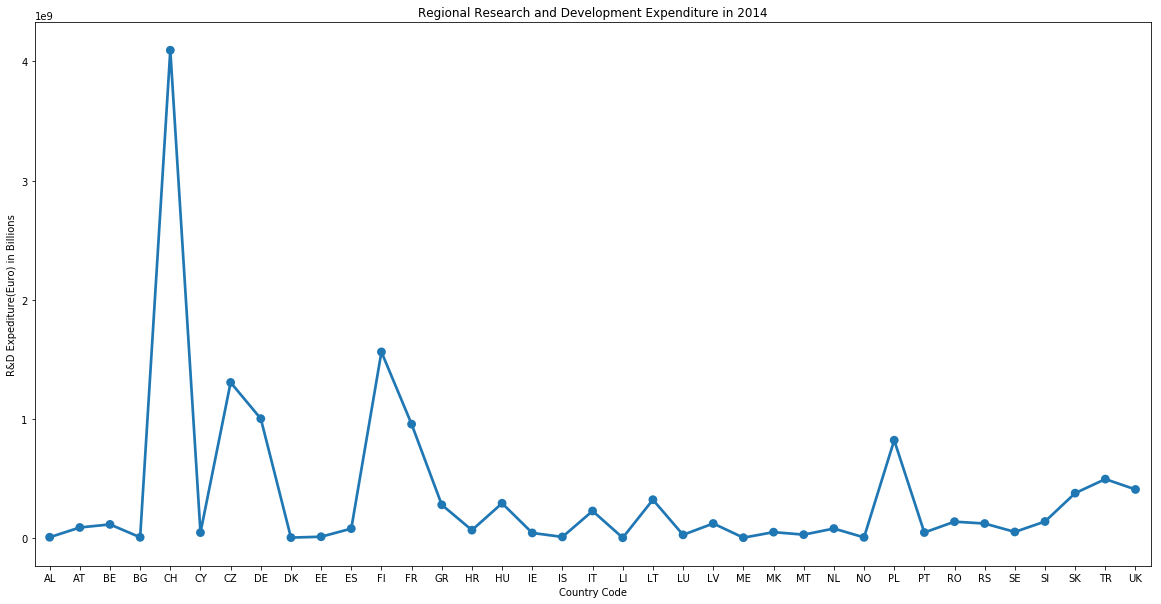

In [156]:
plt.figure(figsize = (20,10))
sns.pointplot(fd_2014.index, fd_2014.values)
plt.title("Regional Research and Development Expenditure in 2014")
plt.ylabel("R&D Expediture(Euro) in Billions")

### Analysis of data in 2015

In [157]:
#analysis data in 2014
fd_2015 = finaldata_2015.groupby(["Country Code"])["R&D Expenditure (EURO)"].sum()
ffd_2015 = pd.DataFrame(fd_2015)
ffd_2015

,R&D Expenditure (EURO)
Country Code,
AL,5.190641e+07
AT,2.285157e+09
BE,1.569732e+08
BG,1.137190e+08
CH,4.447051e+09
CY,6.967665e+07
CZ,1.141190e+08
DE,6.663119e+08
DK,5.444993e+07


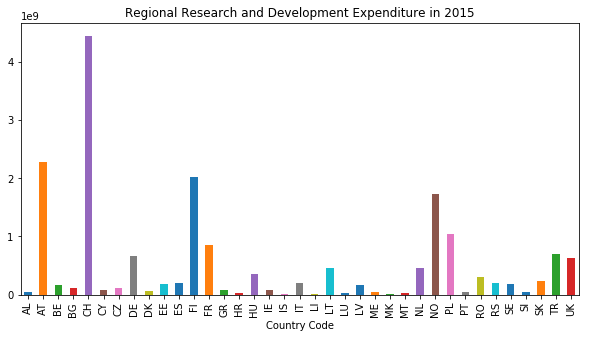

In [158]:
fd_2015.plot.bar(figsize=(10,5), title = "Regional Research and Development Expenditure in 2015")

Text(0, 0.5, 'R&D Expediture(Euro) in Billions')

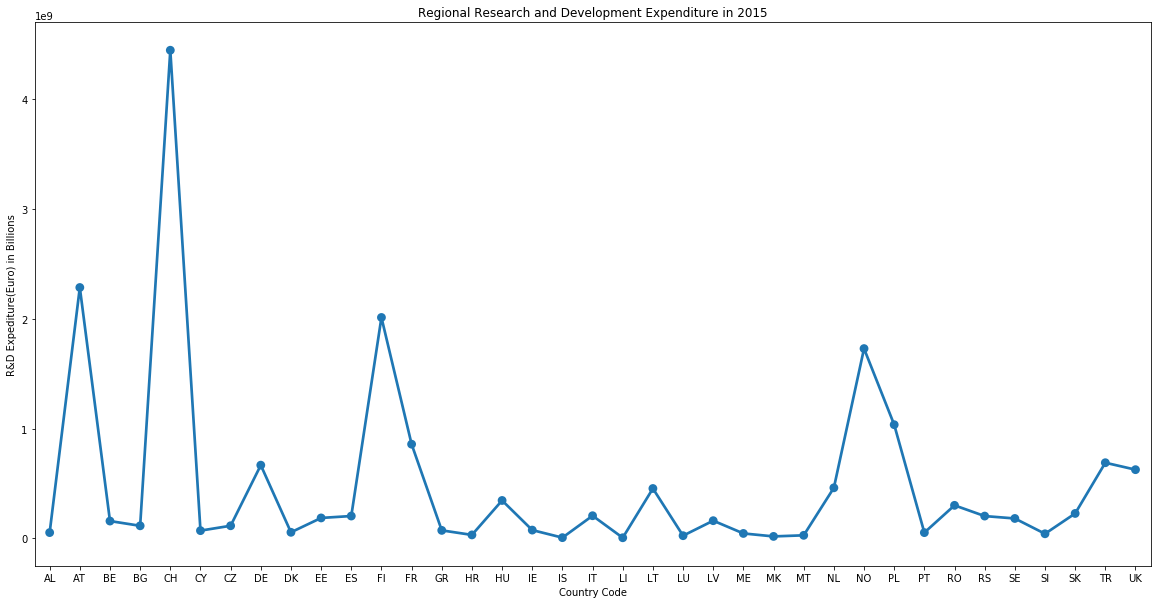

In [159]:
plt.figure(figsize = (20,10))
sns.pointplot(fd_2014.index, fd_2015.values)
plt.title("Regional Research and Development Expenditure in 2015")
plt.ylabel("R&D Expediture(Euro) in Billions")

### Overall Analysis of data 


In [160]:
finaldata1  = finaldata.groupby(["Country Code", "Reference year"])["R&D Expenditure (EURO)"].sum()
finaldata2 = pd.DataFrame(finaldata1)
finaldata2.sample(5)

,,R&D Expenditure (EURO)
Country Code,Reference year,
BE,2011,1.258651e+07
LT,2011,1.485392e+08
IT,2015,2.055009e+08
PL,2015,1.034952e+09
ME,2014,6.548779e+05


In [161]:
finaldata2 = finaldata2.reset_index()

Text(0.5, 20.799999999999983, 'Year')

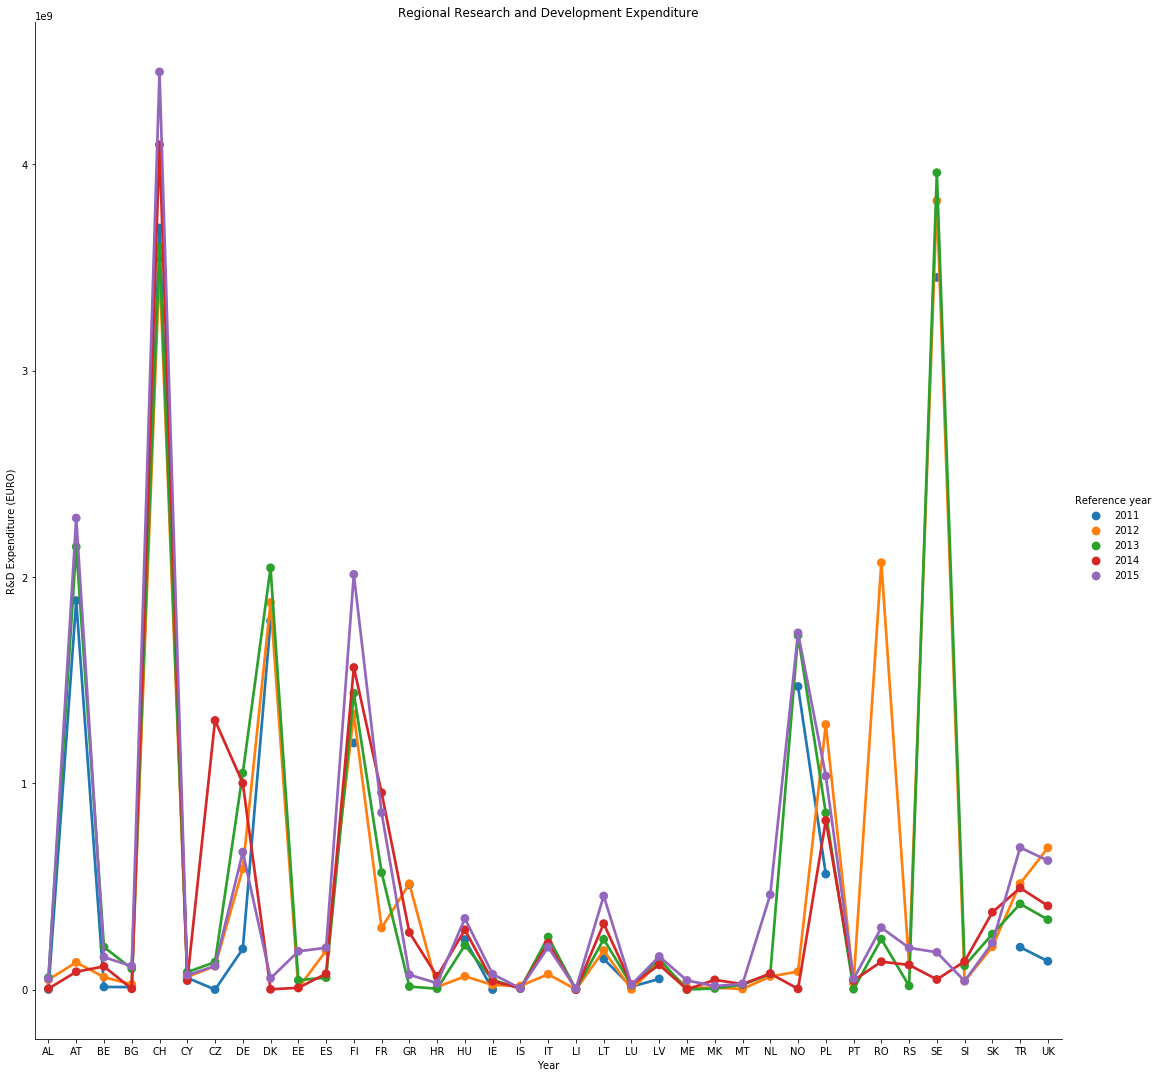

In [162]:
sns.catplot(x = "Country Code", y = "R&D Expenditure (EURO)", hue = "Reference year", data=finaldata2, kind="point",
           height = 15)
plt.title("Regional Research and Development Expenditure")
plt.ylabel("R&D Expenditure (EURO)")
plt.xlabel("Year")